In [1]:
%pylab inline
import pandas as pd
from mpl_toolkits.mplot3d import axes3d

Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib notebook

In [3]:
def readf(file):
    df = pd.read_fwf(file)
    arr = df.to_numpy()
    return arr

In [4]:
def isfloat(num):
    
    try:
        float(num)
        return True
    
    except ValueError:
        return False


In [5]:
def kw(arr,t):
    
    if len(t) == 0:
        sys.exit('Please input a keyword')
    else:
        pass
    
    num = len(arr[:,0])
    ta = []
    for i in range(len(t)):
        ta.append(t[i])
    ta = array(ta)
    ix = arr[:,0]
    nme = arr[:,1]
    ky = arr[:,2]
    sv = arr[:,3]
    
    if len(where(ta == ':')[0])==1:
        if t == ':':
            b = arange(0,num,1)
            
        else:
            c = where(ta == ':')[0][0]
            
            if len(t[0:c])>0:
                A = int(t[0:c])
            else:
                lidx = 0
            
            if len(t[c+1:])>0:
                B = int(t[c+1:])
            else:
                ridx = num 
                   
            if c ==0:
                
                if len(where(ix == B)[0])==1:
                    ridx = where(ix == B)[0][0]+1
                    
                else:
                    sys.exit('list out of range')
                
            elif c == len(t)-1:
                
                if len(where(ix == A)[0])==1: 
                    lidx = where(ix == A)[0][0]
                    
                else:
                    sys.exit('list out of range')
                
            else:
                
                if len(where(arr[:,0] == A)[0])==1 and len(where(arr[:,0] == B)[0])==1:
                    
                    if A<B:
                        lidx = where(ix == A)[0][0]
                        ridx = where(ix == B)[0][0]+1
                        
                    else:
                        sys.exit('the second index must be greater than the first one')
                        
                else:
                    sys.exit('list out of range')
                    
            b = arange(lidx,ridx,1)
                
    else:
        
        if t.isnumeric() == True:
            
            if len(where(arr[:,0] == int(t))[0])>0: 
                b  = where(arr[:,0] == int(t))[0]
                
            else:
                sys.exit('can not find the target element')
                    
        else:
            if len(t)>=2:
                
                if len(where(ta == '*')[0])==1:
                    tse = where(ta == '*')[0][0]
                    keyword = []
                    for i in range(len(nme)):
                            keyword.append(nme[i][0:tse])
                    keyword = array(keyword)
                    
                    if len(where(keyword == t[:-1])[0])>0:
                        b  = where(keyword == t[:-1])[0]
                        
                    else:
                        sys.exit('can not find the target element')
   
                elif 's ' in t and len(where(ta == ' ')[0])==2:
                    n1s = t.find('s ')+2
                    n1e = where(ta == ' ')[0][1]
                    n2s = where(ta == ' ')[0][1]+1
                    n1 = t[n1s:n1e]
                    n2 = t[n2s:]
                    
                    if len(n1)>0 and len(n2)>0 and isfloat(n1) == True and isfloat(n2) == True:
                        
                        n1 = float(n1)
                        n2 = float(n2)
                        
                        if n1>=0 and n2>0:
                            if n2 > n1:
                                if n2 <= max(sv)+5:
                                    if len(where(sv >= n1)[0])>0:
                                        A = where(sv >= n1)[0][0]
                                        if len(where(sv <= n2)[0])>0:
                                            B = where(sv <= n2)[0][-1]
                                            if A <= B: 
                                                b = arange(A,B+1,1)
                                            else:
                                                sys.exit('can not find any element in the given s range')
                                        else:
                                            sys.exit('upper boundry too small')
                                    else:
                                        sys.exit('lower boundry too big')
                                else:
                                    sys.exit('upper boundry too big (might exceed the circumference of the ring)')
                                    
                            else:
                                sys.exit('the second number must be greater than the first one')
                            
                        else:
                            sys.exit('s can not be a negative number')
                                
                    else:
                        sys.exit('requires two numbers to scale s')
                    
                else:
                    if len(where(nme == t )[0])>0: 
                        b  = where(nme == t )[0]
                        
                    elif len(where(ky == t)[0])>0: 
                        b  = where(ky == t)[0]
            
                    else:
                        sys.exit('can not find the target element')
            else:
                sys.exit('Keyword too short')
    
    idx = arr[b,0]
    name = arr[b,1]
    key = arr[b,2]
    s  = arr[b,3]
    l = arr[b,4]
    betaa = arr[b,5]
    betab = arr[b,6]
    alphaa = arr[b,7]
    alphab = arr[b,8]
    etaa = arr[b,9]
    etab = arr[b,10]
    etapa = arr[b,11]
    etapb = arr[b,12]
    phia = arr[b,13]
    phib = arr[b,14]
    
    return idx, name, key, s, l, betaa, betab, alphaa, alphab, etaa, etab, etapa, etapb, phia, phib

In [6]:
def df(idx, name, key, s, l, betaa, betab, alphaa, alphab, etaa, etab, etapa,etapb, phia, phib):
    
    pb=pd.DataFrame({'Index':idx, 'name':name, 'key':key, 's (m)':s,\
                     'l(m)':l, r'$\beta_a$': betaa,r'$\beta_b$': betab,\
                     r'$\alpha_a$': alphaa,r'$\alpha_b$': alphab,\
                     r'$\eta_a$': etaa, r'$\eta_b$': etab,\
                     r'$\eta^{\prime}_a$': etapa,r'$\eta^{\prime}_b$': etapb,
                     r'$\phi_a$':phia, r'$\phi_b$':phib })
    
    #pd.set_option('display.max_rows', None)
    
    display(pb)

In [7]:
def DF(file,t):
    
    arr = readf(file)
    
    idx, name, key, s, l, betaa, betab, alphaa, alphab, etaa, etab, etapa,etapb, phia, phib = kw(arr,t)
    
    df(idx, name, key, s, l, betaa, betab, alphaa, alphab, etaa, etab, etapa, etapb, phia, phib)

In [8]:
DF('Her.txt','BLA*')

,Index,name,key,s (m),l(m),$\beta_a$,$\beta_b$,$\alpha_a$,$\alpha_b$,$\eta_a$,$\eta_b$,$\eta^{\prime}_a$,$\eta^{\prime}_b$,$\phi_a$,$\phi_b$
0,1592,BLA2LE,Sbend,116.806,5.902,8.8726,147.23,-1.0075,-15.718,-0.065433,2.6011e-06,0.007617,2.6682e-07,14.299,18.097
1,1613,BLA4LE,Sbend,141.533,5.902,5.4089,6.5195,-1.9445,1.8495,0.27063,5.3167e-08,0.076894,-1.6182e-07,17.196,18.688
2,1619,BLA4LE,Sbend,149.78,5.902,9.3595,18.946,-0.27563,-2.2426,0.29816,1.5621e-06,0.029813,-2.0114e-07,18.11,20.115
3,5028,BLA6RE,Sbend,2871.75,5.902,9.1136,2.1229,-1.1194,0.20222,0.0055008,4.1423e-07,-0.0027182,-1.0108e-07,270.25,253.01
4,5034,BLA6RE,Sbend,2880,5.902,6.2312,51.543,-0.17038,-6.0968,0.12779,6.0888e-09,0.046983,-4.0968e-08,271.32,254.27
5,5055,BLA4RE,Sbend,2904.05,5.902,11.743,12.779,0.12963,-1.1933,0.54561,3.9027e-07,0.036953,1.1389e-08,272.64,256.83
6,5069,BLA2RE,Sbend,2917.25,3.961,61.656,23.225,-8.0875,4.9966,-0.12857,2.8842e-07,-0.018515,7.4967e-08,275.07,257.16


In [9]:
def selector(arr, k, t):
    
    arr = arr.astype('object')
    
    idx, name, key, s, l, betaa, betab, alphaa, alphab, etaa, etab, etapa, etapb, phia, phib = kw(arr,t)
    
    if k == 'beta':
        return s, append(r'$\beta_a$',betaa) ,append(r'$\beta_b$',betab)
    
    elif k == 'alpha':
        return s,  append(r'$\alpha_a$', alphaa),append(r'$\alpha_b$', alphab)
    
    elif k == 'eta':
        return s, append(r'$\eta_a$', etaa),append(r'$\eta_b$', etab)
    
    elif k == 'etap':
        return s, append(r'$\eta^{\prime}_a$', etapa),append(r'$\eta^{\prime}_b$', etapb)
    
    elif k == 'phase':
        return s, append(r'$\Phi_a$', phia),append(r'$\Phi_b$', phib)
    
    else:
        sys.exit('can not find the desired data')
    

In [10]:
def lp(s, x, y, k):
    
    fig = figure(figsize=(12,6))
    
    if len(s) <= 10:
        plot(s, x[1:], '.', label = x[0])
        plot(s, y[1:], '.', label = y[0])
        
    else:
        plot(s, x[1:], '-', label = x[0])
        plot(s, y[1:], '-', label = y[0])
    
    xlabel('s [m]', size =25)

    if k == 'beta' or k == 'eta':
        
        ylabel('%s [m]'%k, size =25)
        
    else: 
        ylabel('%s '%k, size =25)
        
    legend(loc = 'best', fontsize =20 )
    
    show()

In [11]:
def latp(file, k, t):
    
    arr = readf(file)
    
    if k == ' ':
        
        s, x, y = selector(arr, 'beta', t)
        lp(s, x, y, 'beta')
        
        s, x, y = selector(arr, 'eta', t)
        lp(s, x, y, 'eta')
        
        s, x, y = selector(arr, 'phase', t)
        lp(s, x, y, 'phase')
        
    else:
        
        s, x, y = selector(arr, k, t)
        lp(s, x, y, k)

<IPython.core.display.Javascript object>


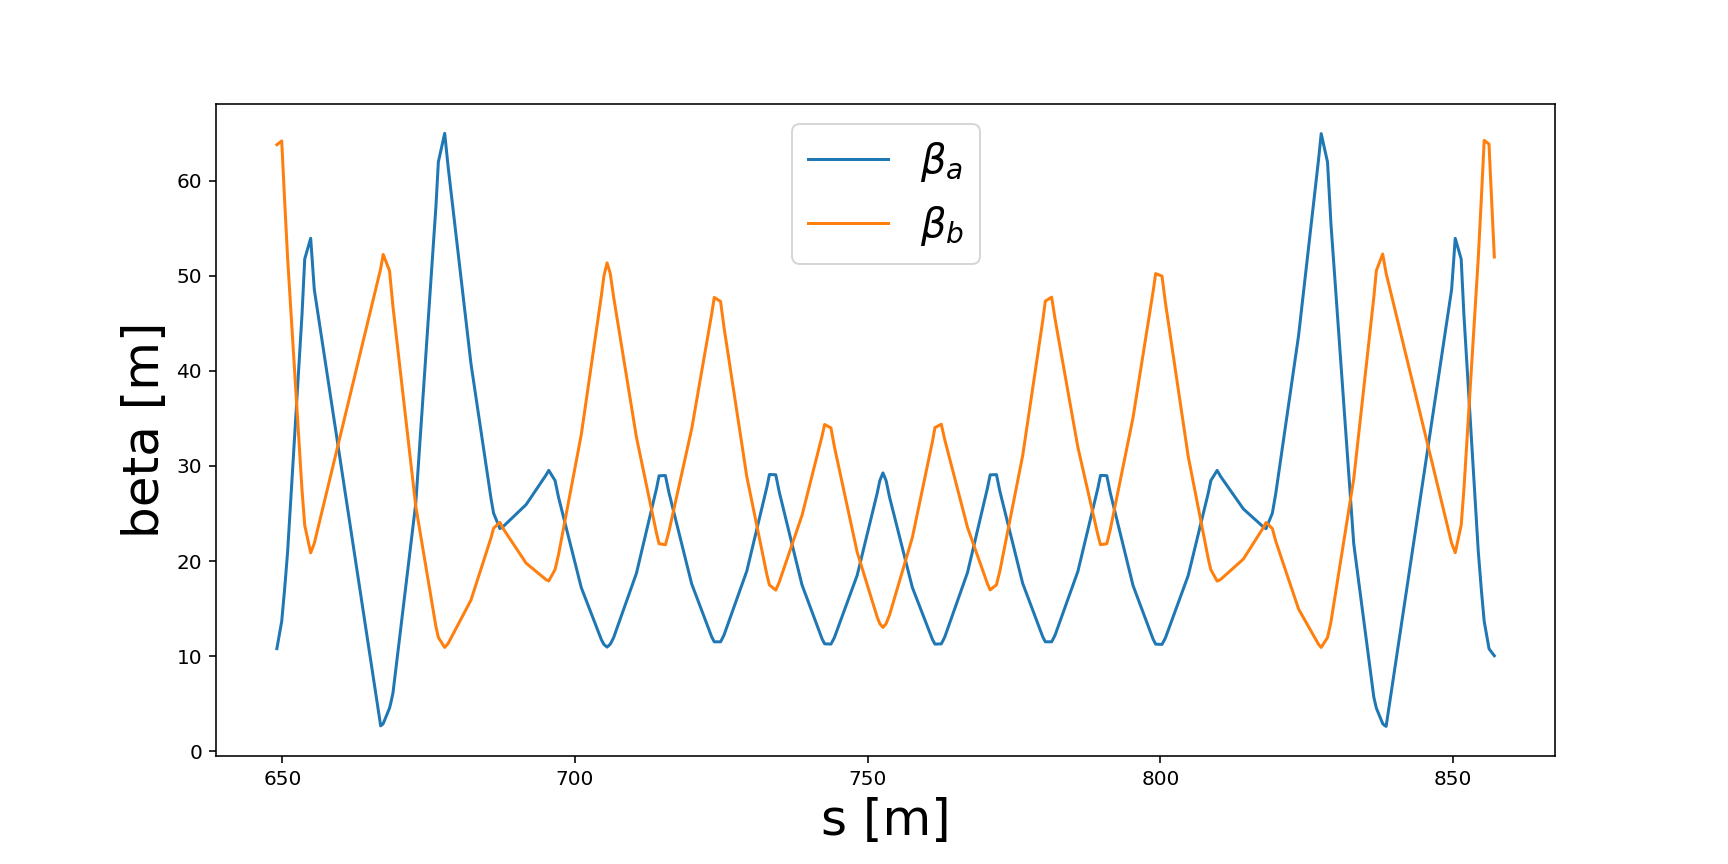

In [13]:
latp('Rot.txt', 'beta', 's 649 859')

<IPython.core.display.Javascript object>


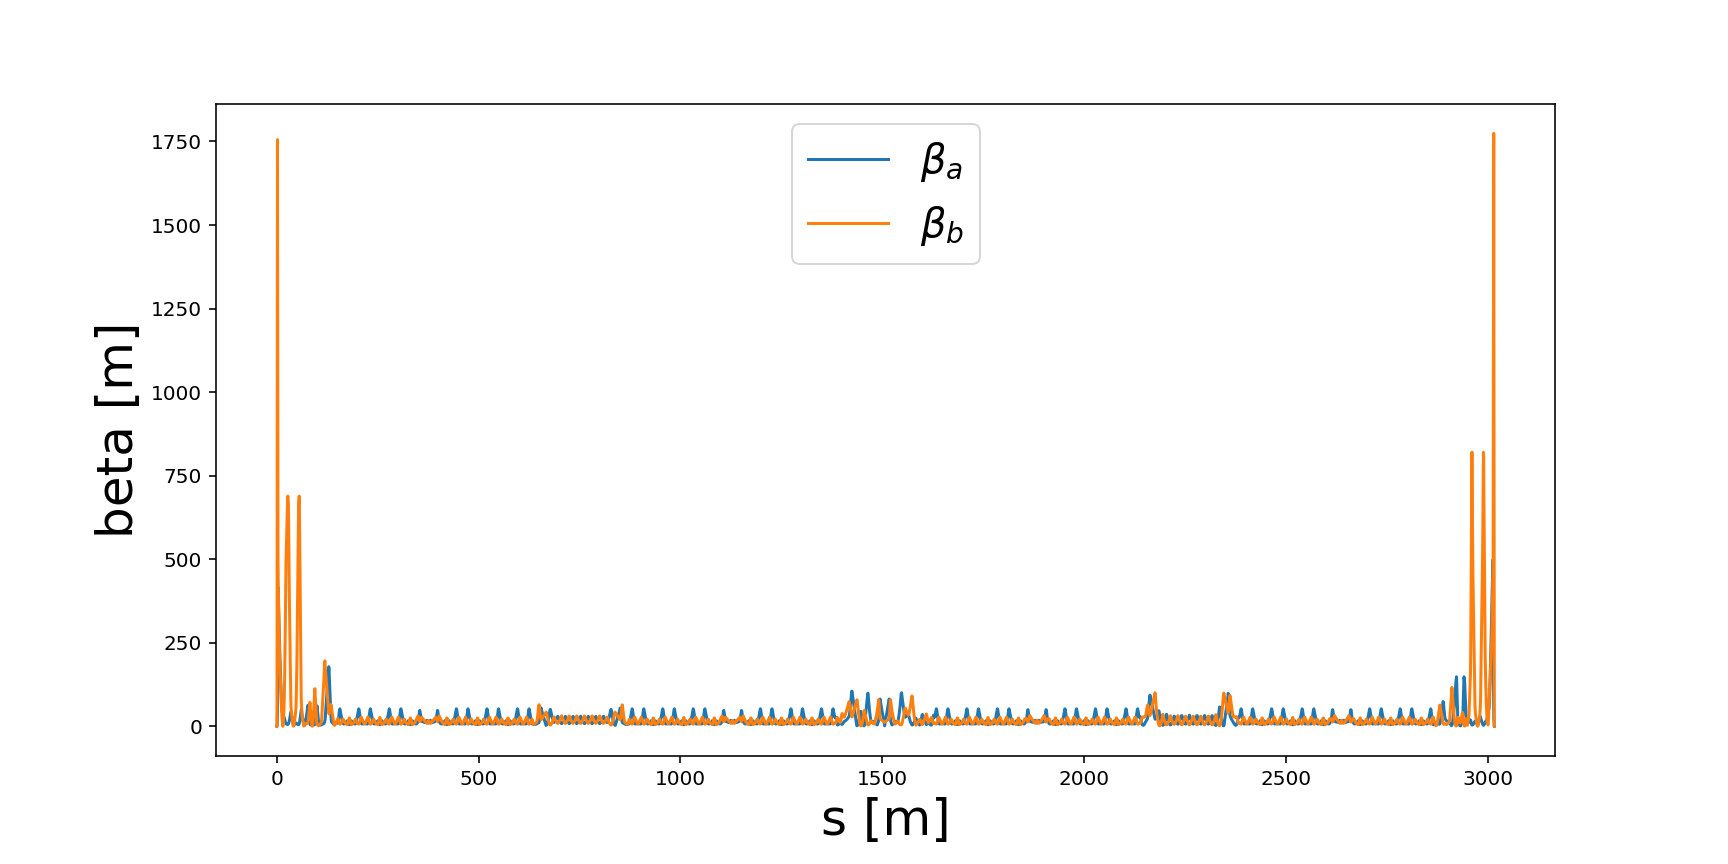

<IPython.core.display.Javascript object>


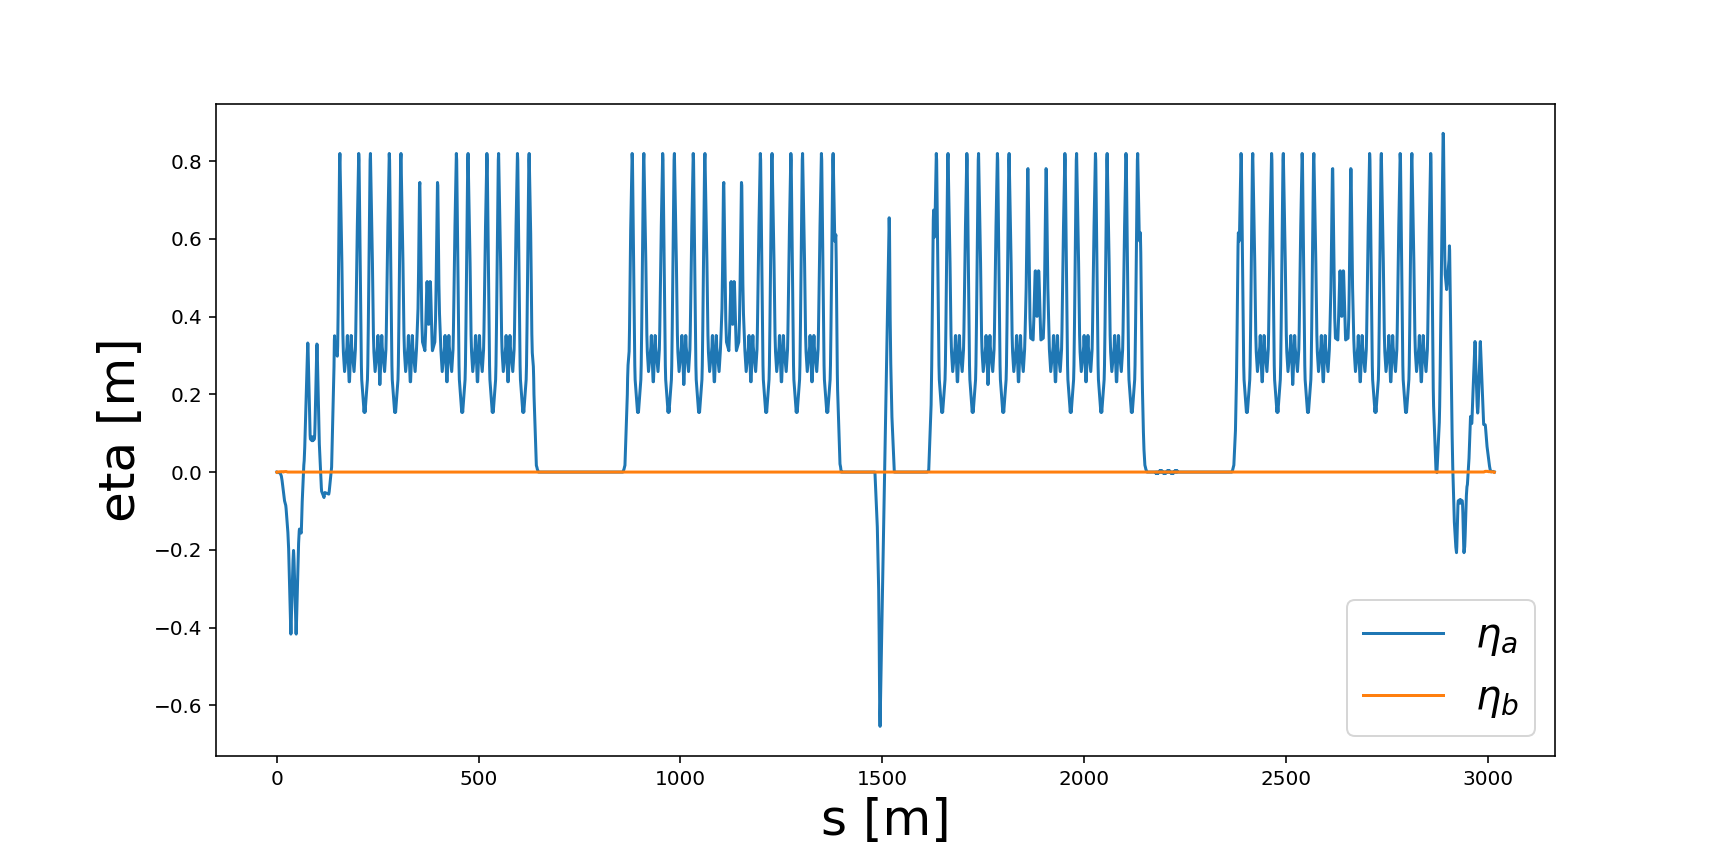

<IPython.core.display.Javascript object>


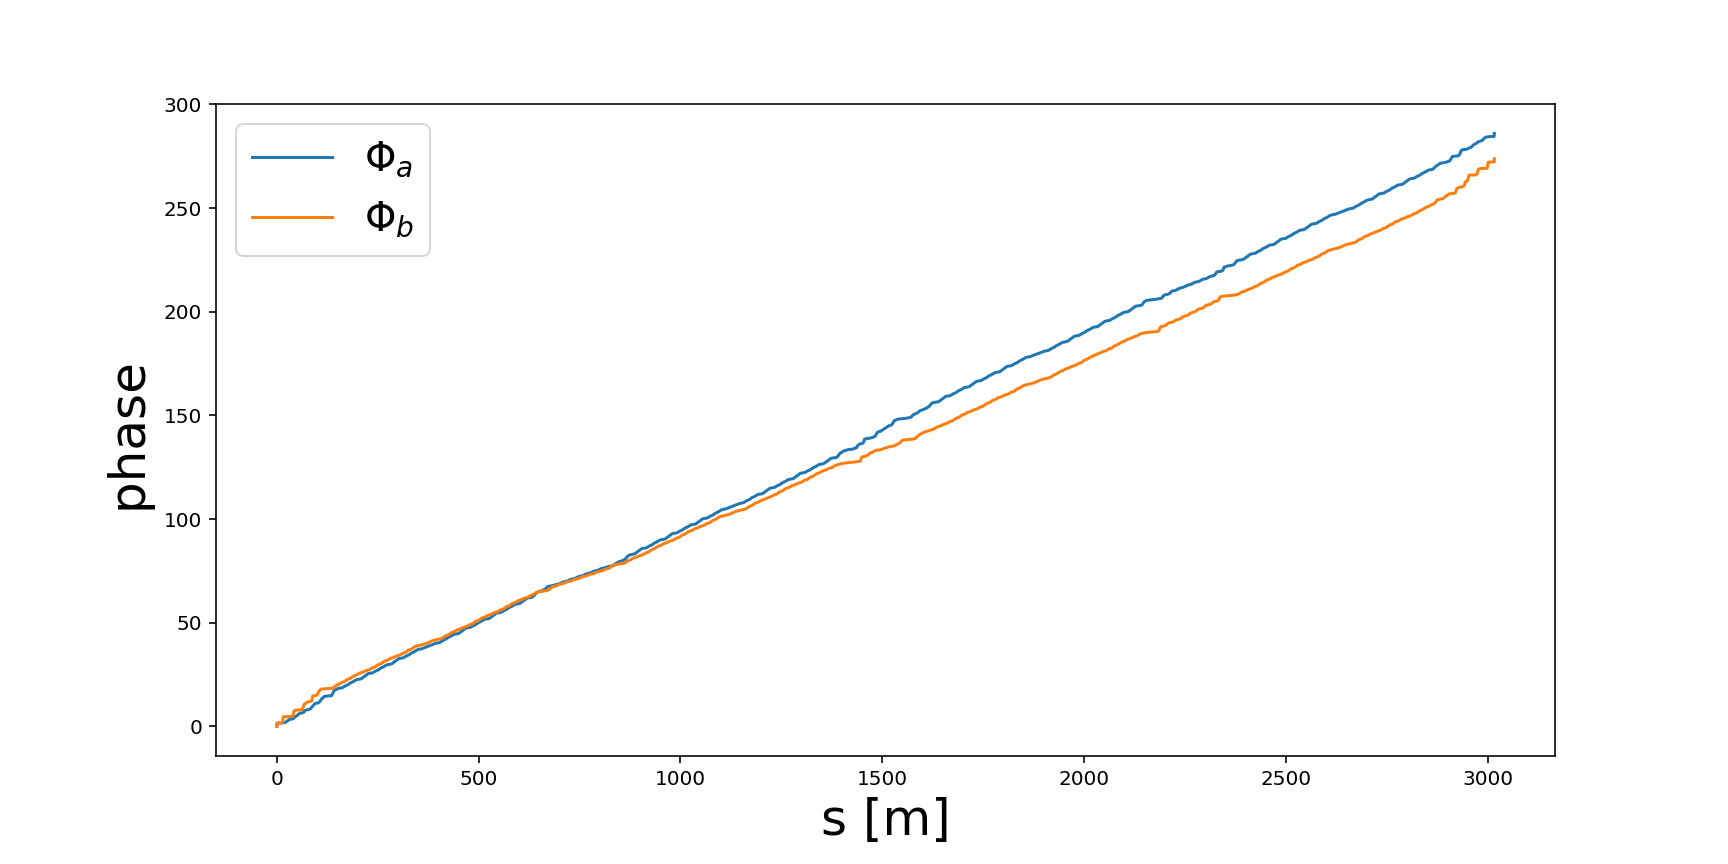

In [15]:
latp('her.txt', ' ', ':')